## 영상정보처리 9주차 과제 템플리트
- 점수: 10점 만점
-- 일부만 찾은 경우 5점, 다 찾으면 10점
- 이미지 경로 잘못 사용한 경우: -3
- 소스 이미지: 
1. messi5.jpg - 샘플 검출 대상 이미지
2. messi5_shirt_blue.png - 셔츠의 파란 부분
3. messi5_shirt_red.png  - 셔츠의 붉은 부분
    

이름: 김경민           
학번: 32200327


# 구글 드라이브 마우팅 및 작업 경로로 이동
- 다음 쉘에 필요한 작업을 하시오. 

In [2]:
from google.colab import drive 
drive.mount('/gdrive')
%cd /gdrive/My\ Drive/Classroom/[22-1 영상정보처리] 2000004793-2022-1/ImageProcClass/Notebook-week7/
!pwd

Mounted at /gdrive
/gdrive/My Drive/Classroom/[22-1 영상정보처리] 2000004793-2022-1/ImageProcClass/Notebook-week7
/gdrive/My Drive/Classroom/[22-1 영상정보처리] 2000004793-2022-1/ImageProcClass/Notebook-week7


다음의 경로는 변경하지 말것. 만일 해당 이미지가 없는 경우, 같이 업로드한 이미지를 해당 폴더에 저장해서 사용할 것. 

In [3]:
src_image_path = '../Dongkeun-OpenCV-ImgData/messi5.jpg'
red_roi_image_path = '../Dongkeun-OpenCV-ImgData/messi5_shirt_red.png'
blue_roi_image_path = '../Dongkeun-OpenCV-ImgData/messi5_shirt_blue.png'

##문제 1:

위에서 언급한 src_image_path 의 이미지 부분 중에서 셔츠 부분을 검출하는 것이 최종 목표이며, 결과 이미지에는 해당 영역의 3-채널 영상 부분이 담겨 있어야 한다. 
방법은 수업 동영상에 설명한 histgram backprojection 을 사용하며, 구체적 단계는 강의 동영상을 참조한다. red_roi_image_path 와 blue_roi_image_path 를 검출 대상에 히스토그램 작성에 사용한다. 






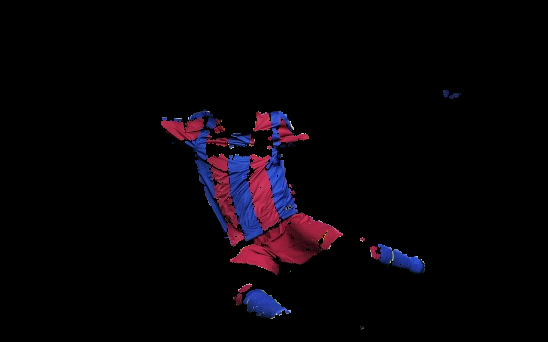

In [57]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

red_roi = cv2.imread(red_roi_image_path) # 강조할 이미지 load(빨간부분)
red_hsv = cv2.cvtColor(red_roi,cv2.COLOR_BGR2HSV) # HSV로 변환
r_h, r_s, r_v = cv2.split(red_hsv)

blue_roi = cv2.imread(blue_roi_image_path) # 강조할 이미지 load(파란부분)
blue_hsv = cv2.cvtColor(blue_roi,cv2.COLOR_BGR2HSV) # HSV로 변환
b_h, b_s, b_v = cv2.split(blue_hsv)

target = cv2.imread(src_image_path) # 원본이미지
hsvt = cv2.cvtColor(target,cv2.COLOR_BGR2HSV)

# calculating object histogram
red_roihist = cv2.calcHist([red_hsv],[0, 1], None, [200, 256], [20, 180, 0, 215]) # 
blue_roihist = cv2.calcHist([blue_hsv],[0, 1], None, [200, 256], [0, 180, 0, 255])


# normalize histogram and apply backprojection
red_roihist = cv2.normalize(red_roihist,red_roihist,0,255,cv2.NORM_MINMAX)
blue_roihist = cv2.normalize(blue_roihist,blue_roihist,0,255,cv2.NORM_MINMAX)

# major 부분 얻어냄
red_dst = cv2.calcBackProject([hsvt],[0,1],red_roihist,[0,180,0,255],1)  # 많이 나온건 밝게, 적게 나온건 어둡게
blue_dst = cv2.calcBackProject([hsvt],[0,1],blue_roihist,[0,180,0,255],1) 
#cv2_imshow(red_dst)
#print()
#cv2_imshow(blue_dst)


# create a disc representing ellipse 
red_disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)) # 픽셀들을 뭉쳐주는 역할(주변부를 비슷하게 펴줌)
blue_disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(4,4))

# 날카로운 부분, 잡음 제거
cv2.filter2D(red_dst,-1,red_disc,red_dst) 
cv2.filter2D(blue_dst,-1,blue_disc,blue_dst)

#print()
#cv2_imshow(red_dst)
#print()
#cv2_imshow(blue_dst)

# threshold
red_ret,red_thresh = cv2.threshold(red_dst,50,255,0) # 임계값 이상이면 255, 아니면 0
blue_ret,blue_thresh = cv2.threshold(blue_dst,50,255,0)


# threshold and binary AND
red_thresh3ch = cv2.merge((red_thresh,red_thresh,red_thresh)) # 3채널로
blue_thresh3ch = cv2.merge((blue_thresh,blue_thresh,blue_thresh))

res = cv2.bitwise_or(red_thresh3ch,blue_thresh3ch)
res = cv2.bitwise_and(target,res)
#res = np.vstack((red_thresh3ch,res)) # 배열을 세로로 결합
#res = np.vstack((blue_thresh3ch,res))
print()
cv2_imshow(res)